# Pre-Processing

### Importing Libraries and Dataset

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
dataset = pd.read_csv('dataset/Telco-Customer-Churn.csv')
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


### Dataset Details, Null Values, and Duplicate Identifications

In [32]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
#identifying the datatypes of each column
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
#We have noticed that the TotalCharges column is of type object. We will convert it to numeric after removing the empty strings and string with just one space

replacement_value = '0.00'
pattern = r'^\s*$'

#replaces empty and space strings with 0.00
dataset['TotalCharges']  = dataset['TotalCharges'].replace(pattern, replacement_value, regex=True)

#parses the column to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

In [7]:
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [8]:
#identifying if any of the features have duplicate values
dataset.duplicated()

print('Total number of duplicate values: ', dataset.duplicated().sum())

Total number of duplicate values:  0


### Feature Selection Based on Simple Domain Expertise

In [9]:
selected_dataset = dataset.drop(['customerID', 'gender','MonthlyCharges'],axis=1)

In [10]:
selected_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


### Exploratory Data Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

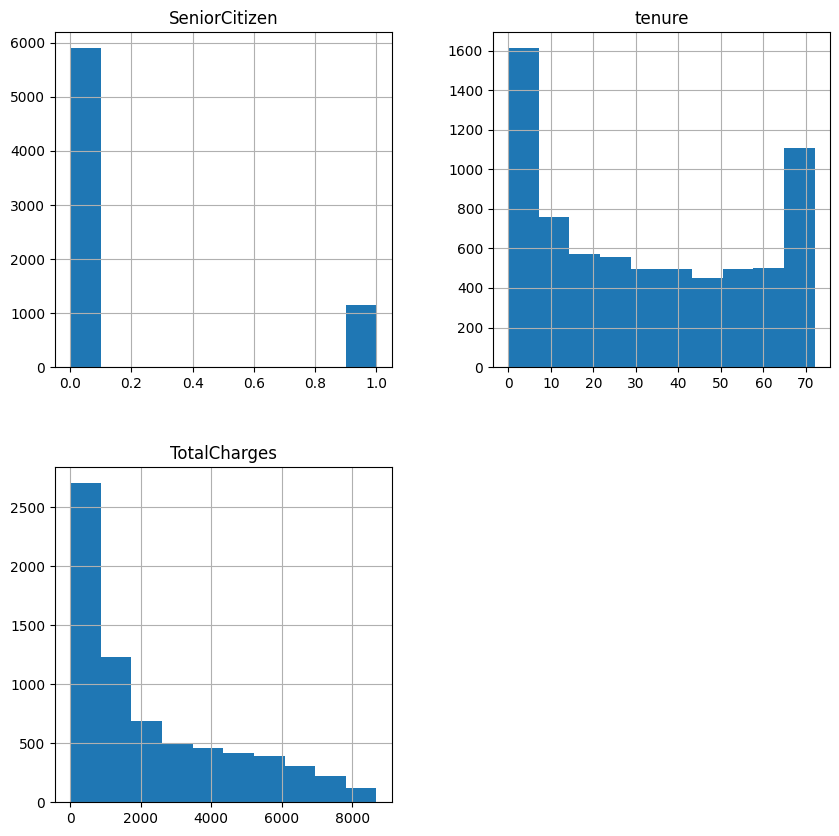

In [11]:
#view the histogram per each numerical column
selected_dataset.hist(figsize=(10,10))

In [12]:
categ_columns = []
for col in selected_dataset.columns:
	if dataset[col].nunique()<10:
		categ_columns.append(col)

print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


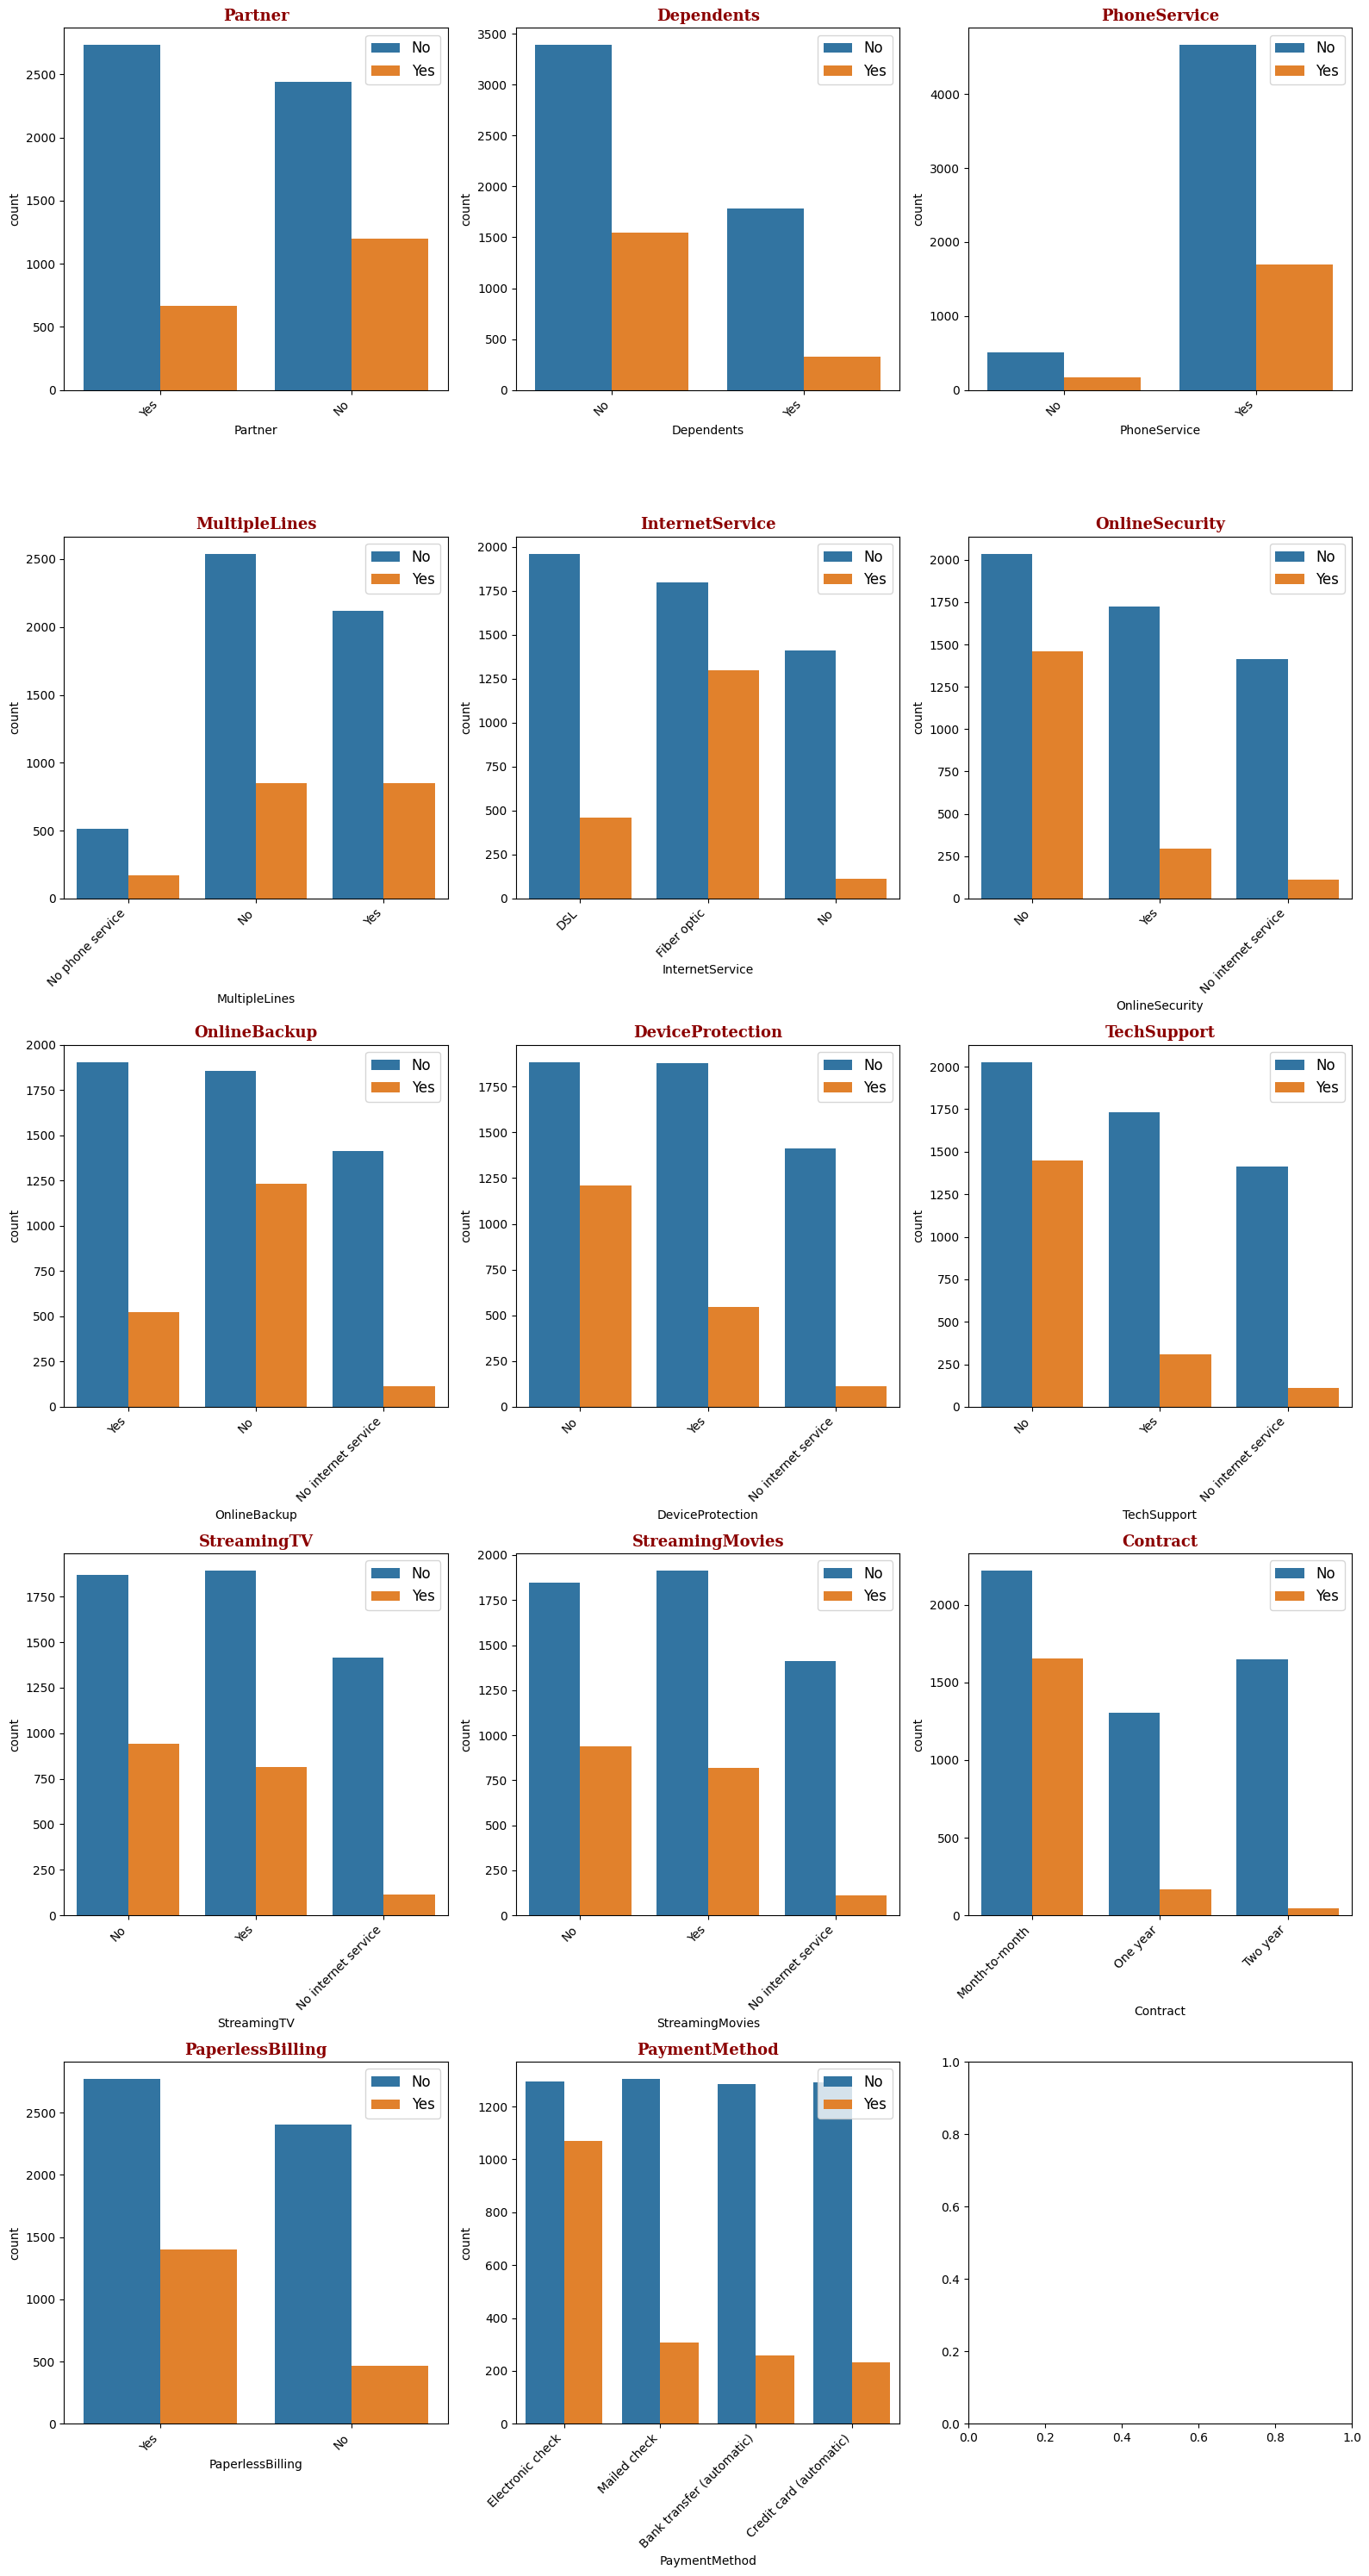

In [13]:
#For categorical columns, we will be using a bar plot to visualize the distribution of the data against churn
# Filter categorical columns
categ_columns = [col for col in selected_dataset.select_dtypes(include=['object']).columns if col not in ['customerID', 'Churn']]

# Create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 13}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 13}

# Calculate the number of rows and columns dynamically based on the number of categorical columns
num_cols = 3  # Number of columns in the grid
num_rows = (len(categ_columns) - 1) // num_cols + 1  # Calculate the number of rows needed

# Define the figsize with a larger height
fig_height = 6 * num_rows  # Adjust height based on the number of rows
fig_width = 16

# Create figure with dynamic grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=[fig_width, fig_height])
#fig.suptitle('Bivariate Analysis', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Loop through each categorical column and create countplots
for i, col in enumerate(categ_columns):
    row_idx = i // num_cols  # Calculate the row index
    col_idx = i % num_cols   # Calculate the column index
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]  # Handle single row case
    sns.countplot(x=selected_dataset[col], hue=selected_dataset['Churn'], ax=ax)
    ax.set_title(col, fontdict=axtitle_dict)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels if needed
    ax.legend(fontsize=12)

# Adjust spacing
fig.tight_layout()

# Show plot
plt.show()


### Creating Independent and Dependent Variables

In [14]:
X = selected_dataset.iloc[:,:-1].values
y = selected_dataset.iloc[:,-1].values

### Encoding Categorical Independent Data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print(f'pre encoded data: {X[1]}\n') #pre encoded data

#encoding categorical columns to meaningful binary values
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,9,10,11,12,13,14,15])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(f'Post encoded data: {X[1]}')

pre encoded data: [0 'No' 'No' 34 'Yes' 'No' 'DSL' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'One year' 'No' 'Mailed check' 1889.5]

Post encoded data: [1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0
 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0
 0.0 0.0 1.0 0 34 1889.5]


### Encoding Categorical Dependent Variables

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(f'Post encoded target data: {y}')

Post encoded target data: [0 0 1 ... 0 1 0]


### Normalization via MinMax Scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

n_columns = X.shape[1]
data_to_normalize = X[:, -2:]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = min_max_scaler.fit_transform(data_to_normalize) #transforms the entire X numpy array to normalized values

minmax_X = X.copy()
minmax_X[:, -2:] = normalized_data
print(minmax_X[0])

[0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0 0.013888888888888888 0.0034370394252026537]


### Normalization via Standard Scaler

In [18]:
print(X[0])

[0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0 1 29.85]


In [19]:
from sklearn.preprocessing import StandardScaler

n_columns = X.shape[1]
data_to_normalize = X[:, -2:]

standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data_to_normalize)

standardized_X = X.copy()
standardized_X[:,-2:] = standardized_data
print(standardized_X[0]) 

[0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0 -1.2774445836787776 -0.9926105235902283]


### Splitting the Dataset to Training, Validating and Testing

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(standardized_X,y,test_size=0.3,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Handling Imbalanced Data (Optional Dataset)

<Axes: xlabel='Churn', ylabel='count'>

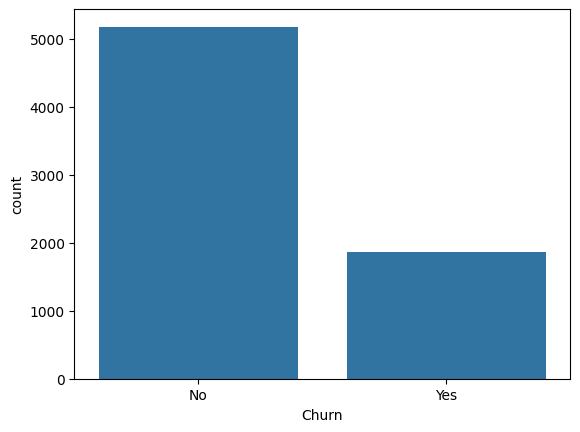

In [21]:
sns.countplot(x='Churn', data=dataset)

In [22]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0: {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1: {}'.format(sum(y_train==1)))

sm = SMOTE(sampling_strategy=1,random_state=1)
x_train_s, y_train_s = sm.fit_resample(X_train,y_train)

print("After upsampling count of label 0: {}".format(sum(y_train_s==0)))
print("After upsampling count of label 1: {}".format(sum(y_train_s==1)))

Before upsampling count of label 0: 3635
Before upsampling count of label 1: 1295
After upsampling count of label 0: 3635
After upsampling count of label 1: 3635


In [23]:
#1. Training dataset
print(X_train.shape)
print(y_train.shape)

#2. Training upsampled dataset -> VIA SMOTE
print(x_train_s.shape)
print(y_train_s.shape)

#3. Validation dataset
print(X_val.shape)
print(y_val.shape)

#4. Testing dataset
print(X_test.shape)
print(y_test.shape)

(4930, 42)
(4930,)
(7270, 42)
(7270,)
(1056, 42)
(1056,)
(1057, 42)
(1057,)


In [50]:
# Import libraries for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_validate


### Training and Validation of Logistic Regression Model

In [65]:
#Creating and fitting the model on training data
model = LogisticRegression(C=1, random_state=42)
model.fit(X_train, y_train)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions
cv_train_pred = cross_validate(model, standardized_X, y, cv=kfold, scoring=['accuracy'])
cv_train_pred = cv_train_pred['test_accuracy'].mean()

# Predicting the target variable on the training data and calculate accuracy score
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#Print training and CV accuracy scores
print("Training accuracy on training dataset",train_accuracy)
print("Mean cv testing accuracy on standardized total dataset:",cv_train_pred )

Training accuracy on training dataset 0.8050709939148073
Mean cv testing accuracy on standardized total dataset: 0.806189310600684


### Testing Model

In [57]:
# Predict labels for testing data
y_test_pred = model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Testing Accuracy on testing set:", test_accuracy)

Testing Accuracy on testing set: 0.8098391674550615


### Model Peformance Evaluation

In [1]:
# Import performance evaluation metric libraries
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc

# Generating a classification report based on the predictions made by the model on the test data
class_report = classification_report(y_test, y_test_pred, target_names=classes)

# Printing the classification report containing metrics such as precision, recall, F1-score, and support for each class
print("Classification Report:")
print(class_report)

NameError: name 'y_test' is not defined

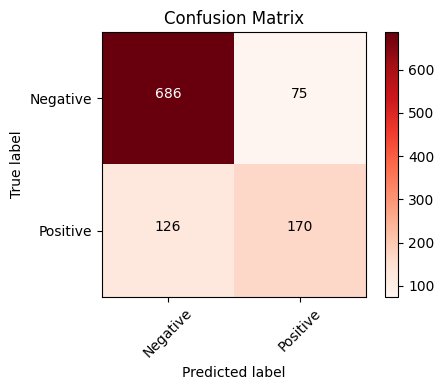

In [47]:
# Generate confusion matrix based on the predictions made by the model on the test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Set figure size
plt.figure(figsize=(5, 4))

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

# ticks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations to the plot to show the count of each cell in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

# Add axis labels and adjust layout for better visualization
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


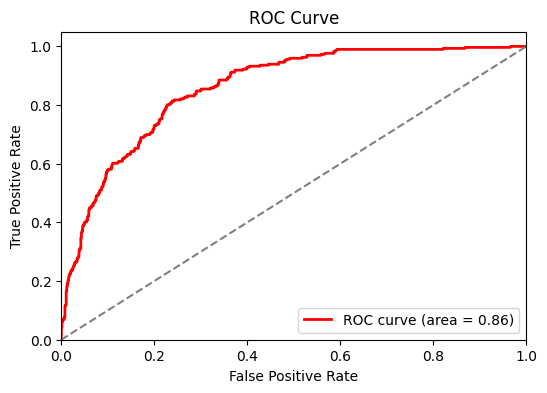

In [29]:
#PLOT ROC-AUC CURVE
# Calculate the probabilities of the positive class
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
